In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
get_ipython().magic(u'matplotlib inline')

In [13]:
#Datos

#Listas
Dats = np.loadtxt('habitt.txt')
Ms = Dats[:,0]
Ts = Dats[:,1]
Rs = Dats[:,2]

#Parametros, en orden:
#Recent Venus, Run away Green, Moist Green, Maximun Green, Early Mass
a1 = [1.4335e-4, 1.2456e-4, 8.1884e-5, 5.9578e-5, 5.4471e-5]
b1 = [3.3954e-9, 1.4612e-8, 1.9394e-9, 1.6707e-9, 1.5275e-9]
c1 = [-7.6364e-12, -7.6345e-12, -4.3618e-12, -3.0058e-12, -2.1709e-12]
d1 = [-1.1950e-15, -1.7511e-15, -6.8260e-16, -5.1925e-16, -3.8282e-16]
S1 = [1.7763, 1.0385, 1.0146, 0.3507, 0.3207]

In [35]:
#Distancias
def Seff(T,R,S,a,b,c,d):
    #Datos
    Tsol = 5.778e3
    Rsol = 6.957e8
    
    #Ecuaciones
    T = T - 5780.
    Seff = S + a*T + b*T**2 + c*T**3 + d*T**4
    LsL = R**2*((T+5780.)/Tsol)**4
    
    #Distancia
    d = (LsL/Seff)**0.5
    
    return d

In [36]:
RV  = []
RAG = []
MG  = []
MaG = []
EM  = []

for i in xrange(0,len(Ms)):
    rv = Seff(Ts[i],R[i],S[0],a1[0],b1[0],c1[0],d1[0])
    RV.append(rv)
    
    rag = Seff(Ts[i],R[i],S[1],a1[1],b1[1],c1[1],d1[1])
    RAG.append(rag)
    
    mg = Seff(Ts[i],R[i],S[2],a1[2],b1[2],c1[2],d1[2])
    MG.append(mg)
    
    mag = Seff(Ts[i],R[i],S[3],a1[3],b1[3],c1[3],d1[3])
    MaG.append(mag)
    
    em = Seff(Ts[i],R[i],S[4],a1[4],b1[4],c1[4],d1[4])
    EM.append(em)

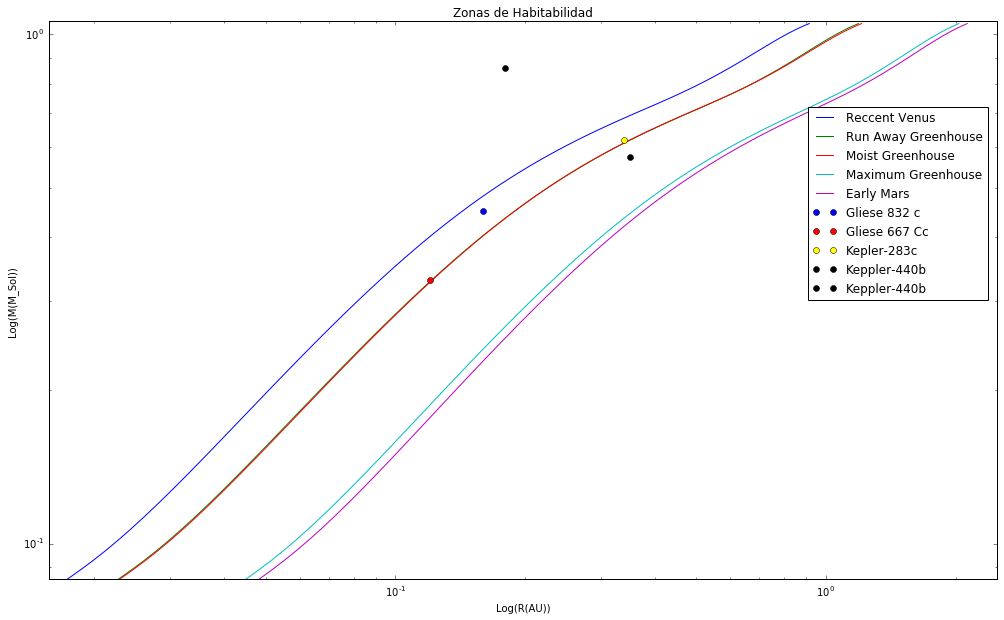

In [89]:
plt.figure(figsize=(17,10))
#Curvas
plt.plot(RV,Ms,label='Reccent Venus')
plt.plot(RAG,Ms,label='Run Away Greenhouse')
plt.plot(MG,Ms,label='Moist Greenhouse')
plt.plot(MaG,Ms,label='Maximum Greenhouse')
plt.plot(EM,Ms,label='Early Mars')
#Exoplanetas
plt.plot(0.16,0.45,'bo',label='Gliese 832 c')
plt.plot(0.12,0.33,'bo',label='Gliese 667 Cc',color='red')
plt.plot(0.34,0.62,'bo',label='Kepler-283c',color='yellow')
plt.plot(0.35,0.575,'bo',label='Keppler-440b',color='black')
#plt.plot(0.18,0.86,'bo',label='Keppler-440b',color='black')
#Caracteristicas
plt.semilogx()
plt.semilogy()
plt.title('Zonas de Habitabilidad')
plt.ylabel('Log(M(M_Sol))')
plt.xlabel('Log(R(AU))')
plt.xlim(0,2.5)
plt.ylim(0.085,1.06)
plt.legend(loc=(0.8,0.5))